<a href="https://colab.research.google.com/github/gongx030/Etv2_limb_manuscript/blob/main/Etv2_vplots_limb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examine the V-plots of Etv2 binding sites WT and Etv2 OE ATAC-seq samples
by Wuming Gong


In [ ]:
start_time <- Sys.time()

### Install external packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [ ]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

### Install R packages from CRAN

In [ ]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
required_packages <- c(
  "BSgenome.Mmusculus.UCSC.mm10", 
  "dplyr", 
  'motifmatchr',
  'patchwork'
)

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion', 'BSgenome.Mmusculus.UCSC.mm10',
  'motifmatchr', 'patchwork'

also installing the dependencies ‘formatR’, ‘rjson’, ‘lambda.r’, ‘futile.options’, ‘plyr’, ‘pracma’, ‘AnnotationDbi’, ‘xtable’, ‘R.oo’, ‘R.methodsS3’, ‘png’, ‘GenomicAlignments’, ‘BiocIO’, ‘restfulr’, ‘futile.logger’, ‘snow’, ‘BH’, ‘reshape2’, ‘poweRlaw’, ‘annotate’, ‘GO.db’, ‘R.utils’, ‘KEGGREST’, ‘plogr’, ‘BiocGenerics’, ‘rtracklayer’, ‘matrixStats’, ‘XVector’, ‘Biobase’, ‘BiocParallel’, ‘caTools’, ‘CNEr’, ‘DirichletMultinomial’, ‘gtools’, ‘RSQLite’, ‘seqLogo’, ‘TFMPvalue’, ‘XML’, ‘MatrixGenerics’, ‘DelayedArray’, ‘zlibbioc’, ‘bitops’, ‘Rhtslib’, ‘RCurl’, ‘GenomeInfoDbData’, ‘BSgenome’, ‘Rcpp’, ‘TFBSTools’, ‘Biostrings’, ‘S4Vectors’, ‘SummarizedExperiment’, 

In [ ]:
library(devtools)

Loading required package: usethis



### Install R packages from github

In [ ]:
install_github("GreenleafLab/chromVARmotifs")

vctrs        (0.4.0 -> 0.4.1) [CRAN]
blob         (1.2.2 -> 1.2.3) [CRAN]
RColorBrewer (1.1-2 -> 1.1-3) [CRAN]
scales       (1.1.1 -> 1.2.0) [CRAN]


Installing 4 packages: vctrs, blob, RColorBrewer, scales

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp6bQRMe/remotes6121c7d0f/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Install `seatac` from github

In [ ]:
install_github('gongx030/seatac@v0.4.0', force = TRUE, quiet = FALSE)
reload(pkgload::inst("seatac"))
library(seatac)

tfautograph  (NA -> 0.3.2 ) [CRAN]
config       (NA -> 0.3.1 ) [CRAN]
here         (NA -> 1.0.1 ) [CRAN]
RcppTOML     (NA -> 0.1.7 ) [CRAN]
zeallot      (NA -> 0.1.0 ) [CRAN]
tfruns       (NA -> 1.5.0 ) [CRAN]
tensorflow   (NA -> 2.8.0 ) [CRAN]
reticulate   (NA -> 1.24  ) [CRAN]
keras        (NA -> 2.8.0 ) [CRAN]
abind        (NA -> 1.4-5 ) [CRAN]
gplots       (NA -> 3.1.1 ) [CRAN]
tfdatasets   (NA -> 2.7.0 ) [CRAN]
tfprobabi... (NA -> 0.15.0) [CRAN]


Installing 13 packages: tfautograph, config, here, RcppTOML, zeallot, tfruns, tensorflow, reticulate, keras, abind, gplots, tfdatasets, tfprobability

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp6bQRMe/remotes6143ccd811/gongx030-seatac-55f9f36/DESCRIPTION’ ... OK
* preparing ‘seatac’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘seatac_0.4.0-010.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tensorflow

Loading required package: tfprobability

Loading required package: tfdatasets

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘pa

### Load R packages

In [ ]:
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(motifmatchr)
library(chromVARmotifs)
library(patchwork)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, u

### TensorFlow setup

In [ ]:
gpus <- tf$config$list_physical_devices('GPU')
for (gpu in gpus){
  tf$config$experimental$set_memory_growth(gpu, TRUE)
}
logical_gpus <- tf$config$experimental$list_logical_devices('GPU')
sprintf('Physical GPUs: %d', length(gpus)) %>% message()
sprintf('Logical GPUs: %d', length(logical_gpus)) %>% message()

Loaded Tensorflow version 2.8.0

Physical GPUs: 1

Logical GPUs: 1



In [ ]:
Sys.time() - start_time

Time difference of 21.69528 mins

## Parameters

In [ ]:
ARGS <- list(
  bin_size = 5L,
  fragment_size_range_max = 640L,
  fragment_size_interval = 10L,
  window_size = 1000L,
  heatmap_window_size = 2000L,
  block_size = 640L,
  sliding_step = 20L,
  min_reads = 5L,
  step_size = 200L,

  vae_num_peaks = 5000L,
  vae_latent = c(10L),
  vae_filters0 = c(128L),
  vae_filters = c(32L),
  vae_downsample_layers = 4L,
  vae_upsample_layers = 4L,
  vae_base_learning_rate = c(1e-2),
  vae_epochs = 200L,
  vae_beta_schedule_method = c('constant'),
  vae_beta0 = 1,
  vae_batch_size = c(128L),
  vae_warmup_ratio = 0.1,

  target_width = 100L,
  min_test_reads = 1L,
  max_test_reads = 10L,
  center_width = 100L # the center width
)

## Load data

In [ ]:
remote_bam_files = c(
  WT_Control =  'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Anterior_WT.dedup.bam',
  Etv2_OE = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Anterior_OE.dedup.bam'
)
for (f in remote_bam_files){
  system(sprintf('wget -x -c -nH %s', f))
}
local_bam_files <- gsub('https://.+?/', './', remote_bam_files)

In [ ]:
remote_meta_file <- 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/etv2_limb_metadata.tsv'
sprintf('wget -cx %s', remote_meta_file) %>% system()
local_meta_file <- gsub('https://', './', remote_meta_file)
x <- read.table(local_meta_file, header = TRUE, sep = '\t')

In [ ]:
remote_bed_files <- x$s3_bed

In [ ]:
for (f in remote_bed_files){
  system(sprintf('wget -x -c -nH %s', f))
}
local_bed_files <- gsub('https://.+?/', './', remote_bed_files)

## Read V-plots

In [ ]:
gr0 <- lapply(local_bed_files, function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = 200L)
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 1, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(fix = 'center', width = ARGS[['window_size']])
gr0 <- gr0[!seqnames(gr0) %in% c('chrM', 'chrY')]
gr <- slidingWindows(gr0, width = ARGS[['block_size']], step = ARGS[['sliding_step']]) %>% unlist()
set.seed(1L); gr <- sample(gr, ARGS[['vae_num_peaks']])
counts <- count_reads(gr, local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10,  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]))

validate_bam | indexing bam files: ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Anterior_WT.dedup.bam

read_bam | reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Anterior_WT.dedup.bam

validate_bam | indexing bam files: ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Anterior_OE.dedup.bam

read_bam | reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Anterior_OE.dedup.bam



In [ ]:
counts <- matrix(counts, nrow = length(counts) / length(local_bam_files), ncol = length(local_bam_files), dimnames = list(NULL, local_bam_files))
valid <- rowSums(counts >= ARGS[['min_reads']]) == length(local_bam_files)
gr <- gr[valid]
sprintf('number of training peaks for VaeModel: %d', length(gr)) %>% message()

number of training peaks for VaeModel: 4971



In [ ]:
x <- read_vplot(gr, filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

read_bam | reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Anterior_WT.dedup.bam

read_bam | reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Anterior_OE.dedup.bam



## Training VAE model for V-plots

In [ ]:
model <- new('VaeModel', model = VaeModel(
  n_samples = dim(x)['sample'],
  latent_dim = ARGS[['vae_latent']],
  block_size = ARGS[['block_size']],
  bin_size = ARGS[['bin_size']],
  filters0 = ARGS[['vae_filters0']],
  filters = ARGS[['vae_filters']],
  upsample_layers = ARGS[['vae_upsample_layers']],
  downsample_layers = ARGS[['vae_downsample_layers']],
  fragment_size_range  = c(0, ARGS[['fragment_size_range_max']]),
  fragment_size_interval = ARGS[['fragment_size_interval']]
))
lr <- WarmUpAndCosineDecay(
  base_learning_rate = ARGS[['vae_base_learning_rate']],
  num_examples = nrow(x),
  batch_size = ARGS[['vae_batch_size']],
  epochs = ARGS[['vae_epochs']],
  warmup_epochs = as.integer(ARGS[['vae_epochs']] * ARGS[['vae_warmup_ratio']])
)
beta <- beta_schedule(
  method = ARGS[['vae_beta_schedule_method']],
  beta0 = ARGS[['vae_beta0']],
  epochs = ARGS[['vae_epochs']]
)
d <- model %>% prepare_data(x)
d <- d %>% tensor_slices_dataset()
model <- model %>% fit(d, batch_size =  ARGS[['vae_batch_size']], epochs = ARGS[['vae_epochs']], learning_rate = lr, compile = TRUE, beta = beta)

epoch=     1/   200 | beta=1.000e+00 | loss= 6733.7183118 | loss_reconstruction= 6732.6396359 | loss_kl=    1.0786997

epoch=     2/   200 | beta=1.000e+00 | loss= 5413.1223583 | loss_reconstruction= 5408.7407978 | loss_kl=    4.3815741

epoch=     3/   200 | beta=1.000e+00 | loss= 4709.1067834 | loss_reconstruction= 4705.6592798 | loss_kl=    3.4474980

epoch=     4/   200 | beta=1.000e+00 | loss= 3748.9823217 | loss_reconstruction= 3747.1000851 | loss_kl=    1.8822236

epoch=     5/   200 | beta=1.000e+00 | loss= 2544.3610996 | loss_reconstruction= 2543.4333684 | loss_kl=    0.9277282

epoch=     6/   200 | beta=1.000e+00 | loss= 1483.5149270 | loss_reconstruction= 1483.2116198 | loss_kl=    0.3033082

epoch=     7/   200 | beta=1.000e+00 | loss=  858.1544722 | loss_reconstruction=  858.0163136 | loss_kl=    0.1381532

epoch=     8/   200 | beta=1.000e+00 | loss=  569.4882296 | loss_reconstruction=  569.1448982 | loss_kl=    0.3433332

epoch=     9/   200 | beta=1.000e+00 | loss=  43

## Compare Etv2 motif centric V-plots between WT  and Etv2 OE




### Extract motif centric regions

In [ ]:
data('homer_pwms') # 321 TF motifs from Homer database

In [ ]:
j <- 82 # Etv2

In [ ]:
gr <- matchMotifs(homer_pwms[j], gr0, genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')

In [ ]:
sprintf('number of motif-centric regions: %s', length(gr)) %>% message()

number of motif-centric regions: 41656



### Read V-plots

In [ ]:
x <- read_vplot(gr, filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

read_bam | reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Anterior_WT.dedup.bam

read_bam | reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Anterior_OE.dedup.bam



### Get the latent representations of the V-plots

In [ ]:
x <- model %>% predict(x, batch_size = ARGS[['vae_batch_size']], vplots = FALSE)

### Testing whether the V-plots between two conditions are significantly different

In [ ]:
res <- model %>% results(x, type = 'vplots', contrast = c('name', 'WT_Control', 'Etv2_OE'))

### Plot the V-plots

In [ ]:
NOR_NFR <- res$padj < 0.05 & res$log_ratio < -0.2

In [ ]:
sprintf('number of significantly different V-plots: %d', sum(NOR_NFR)) %>% message()

number of significantly different V-plots: 430



In [ ]:
x2 <- model %>% predict(x[NOR_NFR], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)

Warning message:
“Removed 128 rows containing missing values (geom_raster).”
Warning message:
“Removed 128 rows containing missing values (geom_raster).”


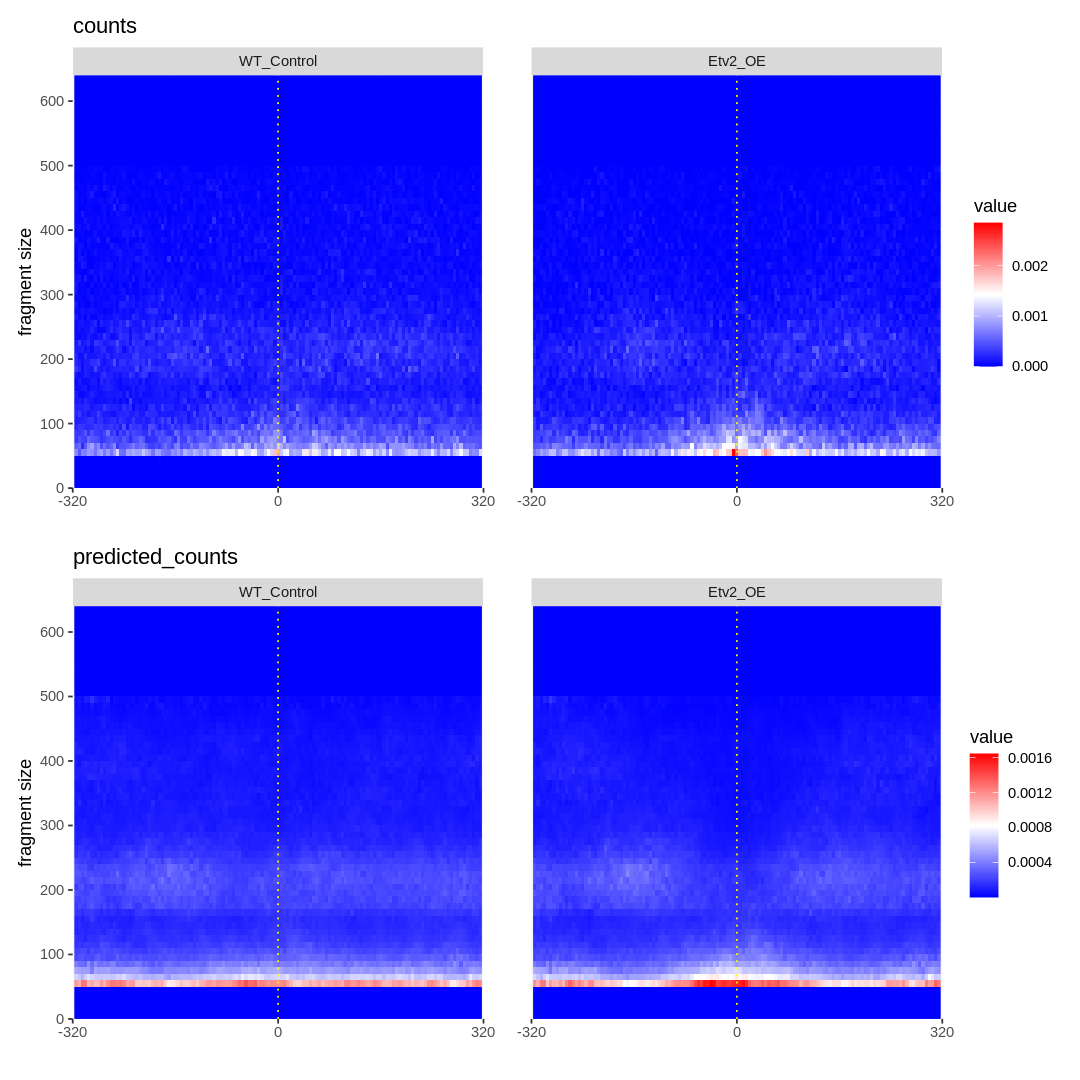

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 9)
p1 <- vplot(x2,  'counts')
p2 <- vplot(x2, 'predicted_counts')
p1 / p2

In [ ]:
zrs <- GRanges(seqnames = 'chr5', ranges = IRanges(start = 29315500))
zrs <- resize(zrs, fix = 'center', width = 1000)

In [ ]:
gr_zrs <- matchMotifs(homer_pwms[j], zrs, genome = BSgenome.Mmusculus.UCSC.mm10,  p.cutoff = 0.05, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')
gr_zrs

GRanges object with 99 ranges and 1 metadata column:
       seqnames            ranges strand |     score
          <Rle>         <IRanges>  <Rle> | <numeric>
   [1]     chr5 29314688-29315327      + | -0.575049
   [2]     chr5 29314698-29315337      + |  7.546673
   [3]     chr5 29314702-29315341      + | -4.174457
   [4]     chr5 29314728-29315367      + | -1.648975
   [5]     chr5 29314759-29315398      + |  7.322850
   ...      ...               ...    ... .       ...
  [95]     chr5 29315643-29316282      - | -1.148704
  [96]     chr5 29315649-29316288      - |  6.953313
  [97]     chr5 29315652-29316291      - | -0.989821
  [98]     chr5 29315653-29316292      - | -0.554817
  [99]     chr5 29315668-29316307      - | -2.639463
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [ ]:
sprintf('number of motif-centric regions: %s', length(gr_zrs)) %>% message()

number of motif-centric regions: 99



In [ ]:
x_zrs <- read_vplot(gr_zrs, filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']], ignore_strand = FALSE)
x_zrs <- model %>% predict(x_zrs, batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
res_zrs <- model %>% results(x_zrs, type = 'vplots', contrast = c('name', 'WT_Control', 'Etv2_OE'))

read_bam | reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Anterior_WT.dedup.bam

read_bam | reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Anterior_OE.dedup.bam



In [ ]:
NOR_NFR_zrs <- res_zrs$pvalue_z < 0.05 & res_zrs$log_ratio < -0.3
sprintf('number of significantly different V-plots: %d', sum(NOR_NFR_zrs)) %>% message()

number of significantly different V-plots: 16



Warning message:
“Removed 128 rows containing missing values (geom_raster).”
Warning message:
“Removed 128 rows containing missing values (geom_raster).”


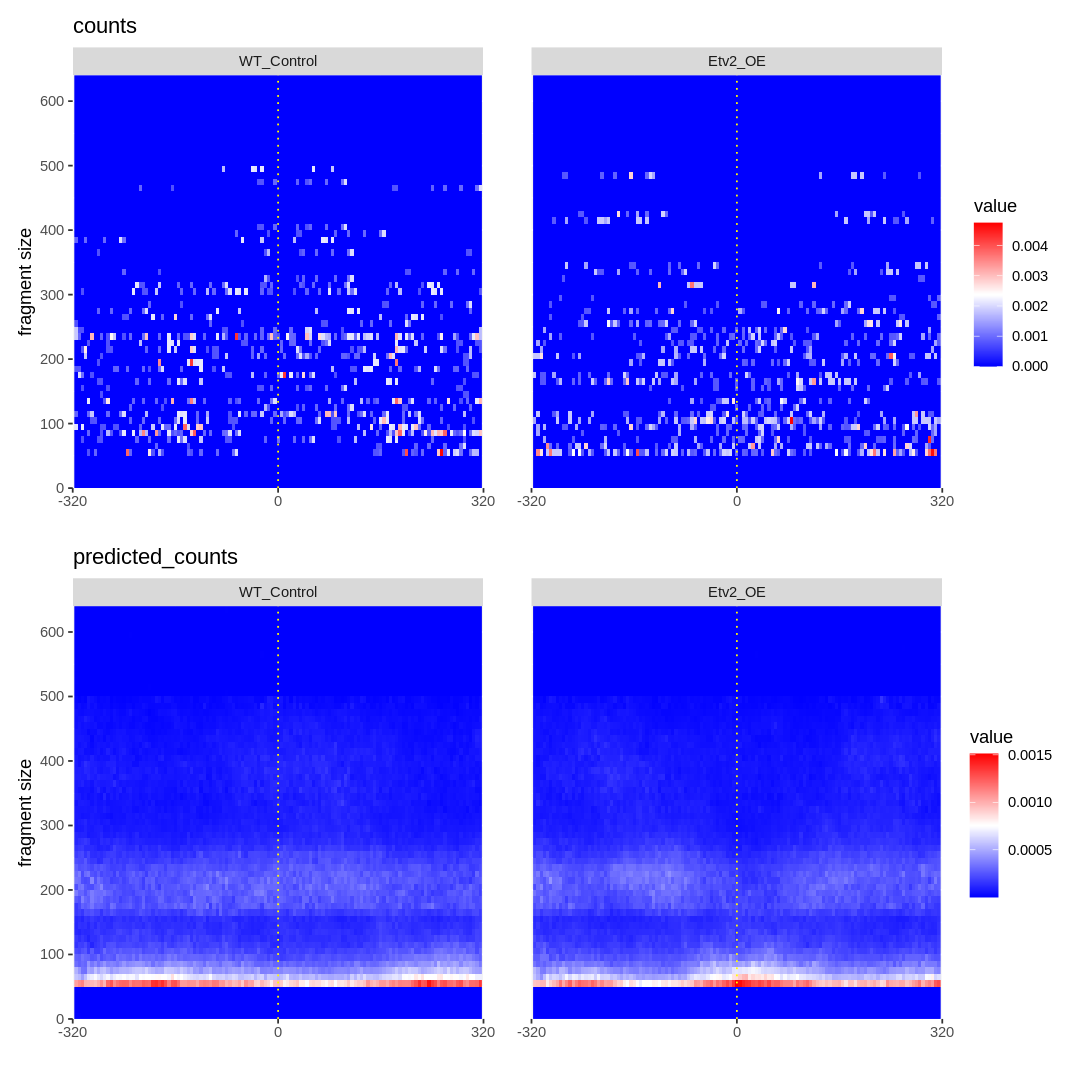

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 9)
p1 <- vplot(x_zrs[NOR_NFR_zrs],  'counts')
p2 <- vplot(x_zrs[NOR_NFR_zrs], 'predicted_counts')
p1 / p2

In [ ]:
res_zrs[NOR_NFR_zrs]

GRanges object with 16 ranges and 5 metadata columns:
       seqnames            ranges strand |    pvalue_z        padj
          <Rle>         <IRanges>  <Rle> |   <numeric>   <numeric>
   [1]     chr5 29314876-29315515      + | 1.19072e-07 1.05974e-05
   [2]     chr5 29314927-29315566      + | 1.00379e-08 9.63638e-07
   [3]     chr5 29315290-29315929      + | 1.85834e-02 7.80501e-01
   [4]     chr5 29315323-29315962      + | 2.42417e-02 9.21183e-01
   [5]     chr5 29314885-29315524      - | 1.10174e-08 1.04665e-06
   ...      ...               ...    ... .         ...         ...
  [12]     chr5 29315019-29315658      - | 6.00609e-06 0.000420426
  [13]     chr5 29315285-29315924      - | 2.79307e-02 1.000000000
  [14]     chr5 29315333-29315972      - | 4.57377e-02 1.000000000
  [15]     chr5 29315338-29315977      - | 1.29908e-02 0.597131159
  [16]     chr5 29315347-29315986      - | 3.77864e-02 1.000000000
       nucleosome_treatment nucleosome_control log_ratio
                  

## SessionInfo

In [ ]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] patchwork_1.1.1                    chromVARmotifs_0.2.0              
 [3] motifmatchr_1.16.0                 dplyr_1.0.8                       
 [5] BSgenome.Mmusculus.UCSC.mm10_1.4.3 BSgenome_1.62.0                   
 [7] rtracklayer_1.54.0        

In [ ]:
Sys.time() - start_time

Time difference of 1.294255 hours